In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree, DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

In [32]:
data = pd.read_excel('/Users/malorenaudin/credit_scoring/dataproject2024.xlsx')
data.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [33]:
data.drop(columns=['ID', 'Pred_default (y_hat)', 'Group'], inplace=True)


In [34]:
data

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),PD
0,34,55,4875,3087,0,36,0.047895,0,1,1,0,0.024480
1,5,29,13000,13000,0,60,0.091667,0,0,0,1,0.331661
2,14,38,17190,14190,0,60,0.088235,0,0,0,0,0.187505
3,16,37,22773,23568,0,48,0.110084,0,1,1,0,0.035441
4,1,61,7700,8526,0,48,0.123404,0,1,0,1,0.340883
...,...,...,...,...,...,...,...,...,...,...,...,...
7425,9,38,4502,4856,0,48,0.083846,1,0,0,1,0.217708
7426,1,33,22900,17900,0,60,0.098000,0,0,0,0,0.063937
7427,3,27,25858,25972,0,24,0.181667,0,0,0,0,0.630863
7428,6,32,12300,11300,0,72,0.091963,0,0,1,0,0.067551


# Decision Tree Regressor as surrogate model

In [35]:
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']
scaler = StandardScaler()  # or MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [27]:
scaler = StandardScaler()  # or MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Split features and target
X = data.drop(columns=['PD'])  # Features
y = data['PD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = DecisionTreeRegressor(max_depth = 3, random_state = 42)
model.fit(X_train, y_train)


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MAE and RMSE for training and testing sets
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Print results
print(f'Training MAE: {train_mae}, Testing MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}')

dot_data = export_graphviz(model, 
                           out_file=None, 
                           feature_names=X.columns,
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Create a Graphviz source object and render it
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Specify the output file name
graph.view()

Training MAE: 0.11383147781866879, Testing MAE: 0.11418674130319229
Training RMSE: 0.1535846771971063, Testing RMSE: 0.1550073200403135


'decision_tree.pdf'

In [30]:
data

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),PD
0,2.472500,0.664668,-1.298968,-1.391741,0,-1.043105,-0.936710,0,1,1,0,0.024480
1,-0.433904,-1.093305,0.011096,0.256408,0,0.194999,-0.220505,0,0,0,1,0.331661
2,0.468084,-0.484776,0.686686,0.454258,0,0.194999,-0.276649,0,0,0,0,0.187505
3,0.668525,-0.552390,1.586881,2.013457,0,-0.424053,0.080850,0,1,1,0,0.035441
4,-0.834787,1.070354,-0.843469,-0.487445,0,-0.424053,0.298793,0,1,0,1,0.340883
...,...,...,...,...,...,...,...,...,...,...,...,...
7425,-0.033020,-0.484776,-1.359110,-1.097624,0,-0.424053,-0.348465,1,0,0,1,0.217708
7426,-0.834787,-0.822847,1.607358,1.071088,0,0.194999,-0.116877,0,0,0,0,0.063937
7427,-0.634345,-1.228533,2.084302,2.413149,0,-1.662157,1.252095,0,0,0,0,0.630863
7428,-0.333683,-0.890462,-0.101771,-0.026237,0,0.814050,-0.215657,0,0,1,0,0.067551


# Linear Regression as surrogate model

Training MAE: 0.10560073317540215, Testing MAE: 0.10482945754603604
Training RMSE: 0.1413888425272183, Testing RMSE: 0.13948974426785699


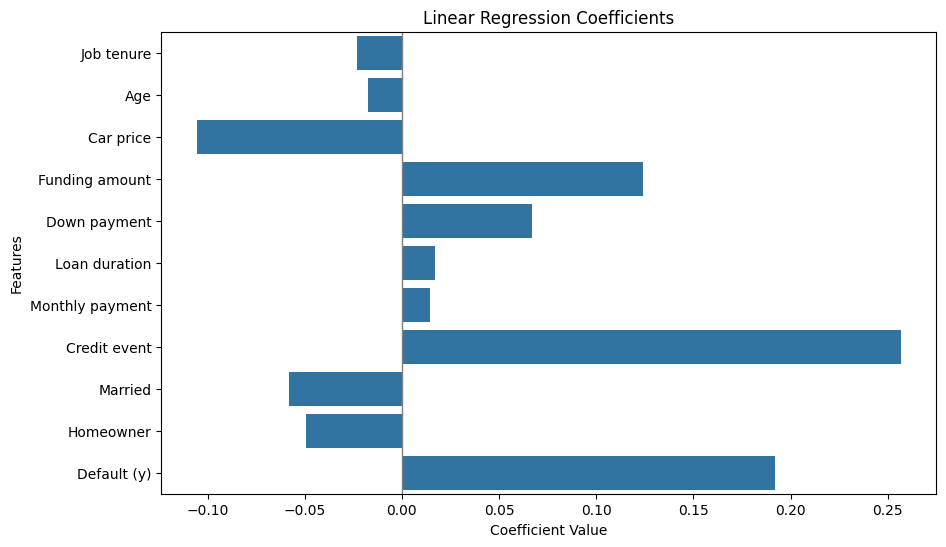

In [36]:
# Split features and target
X = data.drop(columns=['PD'])  # Features
y = data['PD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MAE and RMSE for training and testing sets
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

# Print results
print(f'Training MAE: {train_mae}, Testing MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}')

# Visualize the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='grey', lw=1)  # Add a vertical line at x=0
plt.show()